# PROBLEM STATEMENT

<h4>
<i>    
A marketing agency has many customers that use their service to produce ads for the client/customer websites. 
<br>
    
    
They've noticed that they have quite a bit of churn in clients. They basically randomly assign account managers right now, but want you to create a machine learning model that will help predict which customers will churn (stop buying their service) so that they can correctly assign the customers most at risk to churn an account manager. 
    
Luckily they have some historical data, can you help them out? Create a classification algorithm that will help classify whether or not a customer churned. Then the company can test this against incoming data for future customers to predict which customers will churn and assign them an account manager.</i></h4>

In [1]:
# pip install seaborn
# pip install matplotlib

In [2]:
# importing necessary Libraries

import numpy as np # for array(vector) operations
import pandas as pd # for data manipulation, reading, writing, inserting, deleting

#For Pllotting Graphs
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

# for model selection, accuracy
import sklearn

In [3]:
# reading .csv file
dataset = pd.read_csv("customer_churn.csv")

In [4]:
dataset

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1
...,...,...,...,...,...,...,...,...,...,...
895,Paul Miller,42.0,12800.82,1,3.62,8.0,2007-12-01 13:29:34,"9316 Julian Fort Suite 328 North Leslie, ME 43961",Evans-Lucero,0
896,Natalie Hodges,52.0,9893.92,0,6.91,7.0,2008-12-28 15:23:58,"8419 William Square Apt. 695 Martinville, RI 3...",Perry and Sons,0
897,Ana Smith,45.0,12056.18,0,5.46,4.0,2014-06-20 05:10:09,Unit 8633 Box 8738 DPO AA 14126-5026,Schneider-Smith,0
898,Justin Leonard,51.0,6517.93,1,5.47,10.0,2012-05-30 00:15:43,"49800 Torres Ways Suite 886 West Bradleybury, ...",Robles-Abbott,0


In [6]:
dataset = dataset.drop(columns=['Names', 'Onboard_date', 'Location', 'Company'])

In [7]:
dataset

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,42.0,11066.80,0,7.22,8.0,1
1,41.0,11916.22,0,6.50,11.0,1
2,38.0,12884.75,0,6.67,12.0,1
3,42.0,8010.76,0,6.71,10.0,1
4,37.0,9191.58,0,5.56,9.0,1
...,...,...,...,...,...,...
895,42.0,12800.82,1,3.62,8.0,0
896,52.0,9893.92,0,6.91,7.0,0
897,45.0,12056.18,0,5.46,4.0,0
898,51.0,6517.93,1,5.47,10.0,0


In [8]:
# Indepent variable
X = dataset.drop("Churn", axis=1)

# Dependent variable
y = dataset['Churn']

In [9]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.77, random_state=12)

In [71]:
from sklearn import tree

In [72]:
classifier = tree.DecisionTreeClassifier()

In [73]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [74]:
# Prediction
y_pred = classifier.predict(X_test)

In [75]:
# Checking Accuracy Score
from sklearn.metrics import accuracy_score, classification_report

In [76]:
accuracy = accuracy_score(y_pred, y_test)

In [77]:
accuracy

0.84992784992785

<h5> Accuracy is around 84.13% which is better than the logistic regression model </h5> 

[Text(0.5160714285714286, 0.9545454545454546, 'x[4] <= 10.5\ngini = 0.261\nsamples = 207\nvalue = [175, 32]'),
 Text(0.21785714285714286, 0.8636363636363636, 'x[4] <= 8.5\ngini = 0.126\nsamples = 177\nvalue = [165, 12]'),
 Text(0.08571428571428572, 0.7727272727272727, 'x[1] <= 6954.535\ngini = 0.019\nsamples = 105\nvalue = [104, 1]'),
 Text(0.05714285714285714, 0.6818181818181818, 'x[1] <= 6652.93\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.02857142857142857, 0.5909090909090909, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.08571428571428572, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.11428571428571428, 0.6818181818181818, 'gini = 0.0\nsamples = 96\nvalue = [96, 0]'),
 Text(0.35, 0.7727272727272727, 'x[3] <= 7.02\ngini = 0.259\nsamples = 72\nvalue = [61, 11]'),
 Text(0.24285714285714285, 0.6818181818181818, 'x[0] <= 48.5\ngini = 0.19\nsamples = 66\nvalue = [59, 7]'),
 Text(0.14285714285714285, 0.5909090909090909, 'x[3] <= 5.535\ngini = 0.135

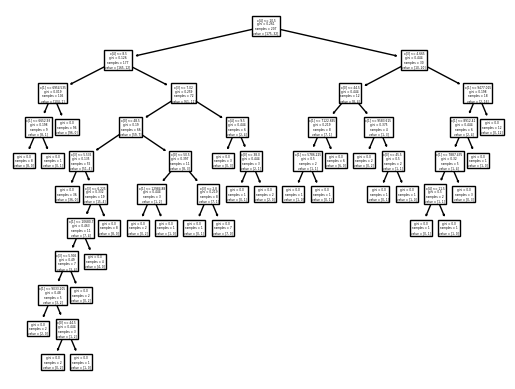

In [18]:

# now changing some parameters

tree.plot_tree(classifier)

In [19]:
plt.show()